In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading dataset
df=pd.read_csv('titanic_train.csv')
df

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


here our target variable is 'survived' so basically it is classification problem

In [8]:
#droping unwanted column
df.drop('Unnamed: 0',axis=1,inplace= True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [5]:
df.isnull().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have many missing values, we try to fill missing vaues in Data-preprocessing step

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1-The attributes "Age, SibSp, Parch, Fare" has large difference in their 75% and maximum value, which indicates the presence of outliers in the dataset.
2-The attribute Fare has large difference in thier mean and median value

# Visualising Data

Text(0.5, 1.0, 'Count Plot of Sex')

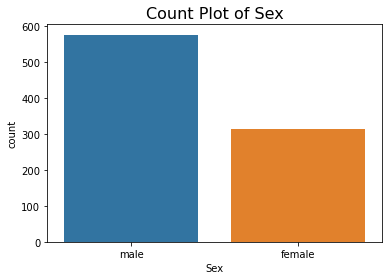

In [11]:
sns.countplot('Sex' ,data = df)
plt.title('Count Plot of Sex', fontsize=16)

In [14]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Ratio of male and female in ship is quite high

Text(0.5, 1.0, 'Count Plot of Sex')

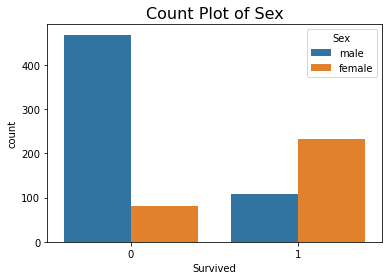

In [16]:
sns.countplot('Survived' ,data = df,hue='Sex')
plt.title('Count Plot of Sex', fontsize=16)

here 0= dead and 1=survived from the figure it shows that very few people survived

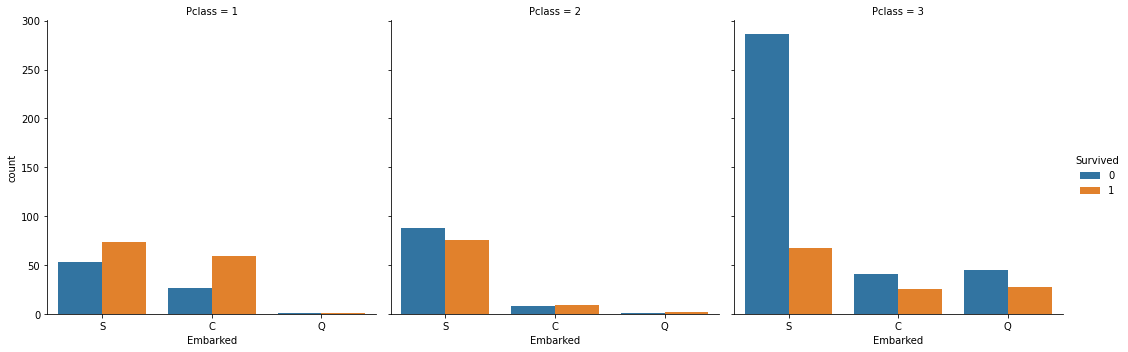

In [18]:
sns.catplot(x ='Embarked', hue ='Survived', kind ='count', col ='Pclass', data = df) 

In [20]:
# Number of Passengers on various Pclass
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

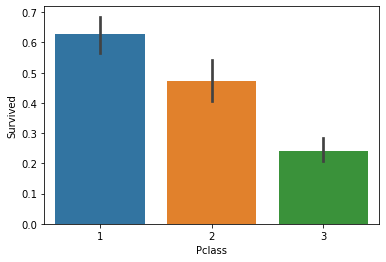

In [21]:
# Survival on the basis of Pclass
sns.barplot(x='Pclass', y='Survived', data=df)

Although Pclass = 3 had maximum number of passengers, very few survived

<AxesSubplot:xlabel='Age', ylabel='Count'>

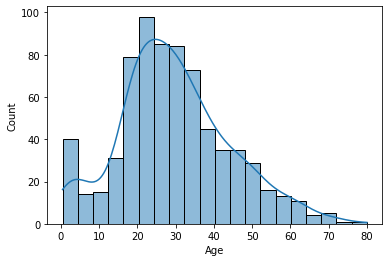

In [23]:
# Histogram plot of age
sns.histplot(data = df['Age'], kde = True)

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

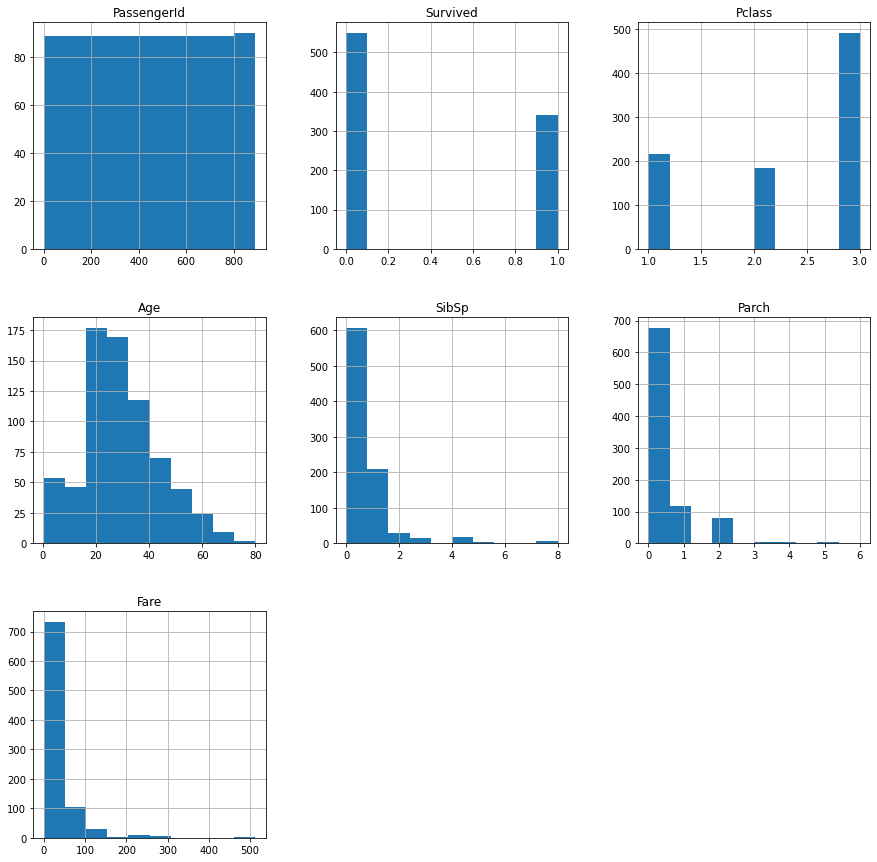

In [25]:
df.hist(figsize=(15,15))

In [26]:
#observation
#Age attribute seems to be normally distributed.
#Fare, Parch, SibSp are positevely skewed ie shifted towards left.
#Pclass attributes is label encoded having values range 1 to 3, and 3 has most number of observations
#Survived attribute is binary categocial (Target variable), in which 0 has most number of observation, ie most of the people died
#PassengerID is irrelevent column

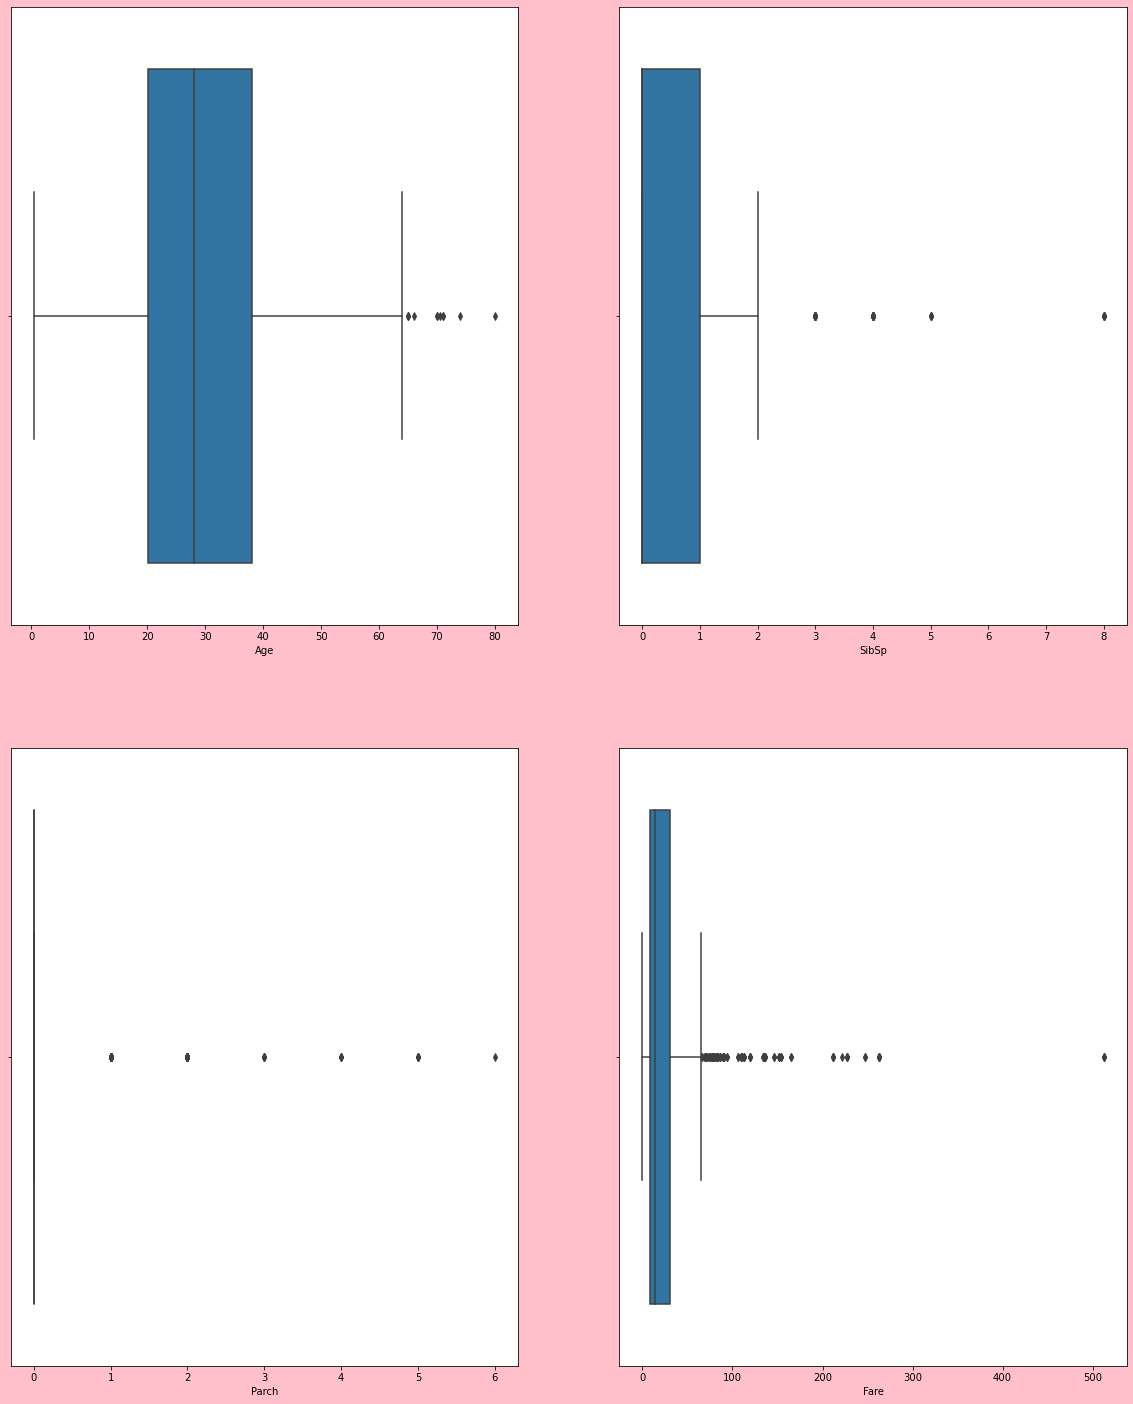

In [31]:
plt.figure(figsize=(20,25),facecolor = 'pink')
graph = 1
col = ['Age', 'SibSp', 'Parch', 'Fare']
for column in col:
    if graph<=4:
        ax = plt.subplot(2,2,graph)
        sns.boxplot(df[column])
        plt.xlabel(column)
    
    graph+=1
plt.show() 

we can visualise that this feature contain outlier but we can neglect it
for example age column contain people with age above 70 it can be true as people with age more than 70 can be there on ship

<AxesSubplot:>

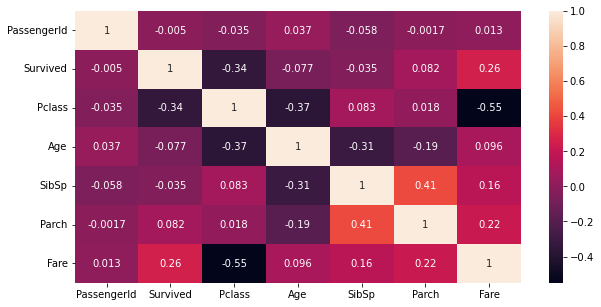

In [32]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)

from the map we can state no two feature is highly corelated nor any feature is highly corelated with target variable

# Data-preprocesing

In [58]:
#df['Age'].fillna(df['Age'].mean(), inplace= True)
#df["Embarked"].fillna(df['Embarked'].mode()[0], inplace=True)
#for cabin column as there are 891 rows out of which 687 rows of cabin data are missing i.e. almost 70% data so we can drop it
#df.drop(['Cabin'], axis=1, inplace=True)

In [59]:
#also we can drop column passID,name and ticket as they wont affwct our target variable
#df.drop(['PassengerId','Name', 'Ticket'], axis=1, inplace=True)

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))

In [80]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Spliting Data into Dependent Variable and Independent variable

In [79]:
X = df.drop(["Survived"], axis=1)
y = df["Survived"]

In [62]:
#LET FIRST FIND THE BEST RANDOM STATE TO GET BEST ACCUARACY

maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is",maxAccu,"at random_state",maxRS)

Best accuracy is 0.8544776119402985 at random_state 174


In [82]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=174)

# Logistic Regression

In [83]:
clf = LogisticRegression()

#Train Model
clf.fit(x_train, y_train)
# Prediction on Test and Train Set 
pred_logistic_test = clf.predict(x_test)
pred_logistic_train = clf.predict(x_train)

print("Training Accuracy: ", accuracy_score(y_train, pred_logistic_train))
print("Test Accuracy: ", accuracy_score(y_test, pred_logistic_test))

Training Accuracy:  0.8083832335329342
Test Accuracy:  0.7892376681614349


# Decision Tree

In [84]:
dt = DecisionTreeClassifier()

# Train model 
dt.fit(x_train, y_train)

pred_dt_test = dt.predict(x_test)
pred_dt_train = dt.predict(x_train)

print("Training Accuracy: ", accuracy_score(y_train, pred_dt_train))
print("Test Accuracy: ", accuracy_score(y_test, pred_dt_test))

Training Accuracy:  0.9850299401197605
Test Accuracy:  0.7892376681614349


# Random Forest

In [66]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

train_pred_rf = rf.predict(x_train)
pred_rf = rf.predict(x_test)

print("Training Accuracy: ",accuracy_score(y_train, train_pred_rf))
print("Test Accuracy: ",accuracy_score(y_test, pred_rf))

Training Accuracy:  0.9835329341317365
Test Accuracy:  0.8295964125560538


# Gradient Boost

In [67]:
gb = GradientBoostingClassifier()

# Training model
gb.fit(x_train, y_train)

# Prediction on test and train set
gb_pred_train = gb.predict(x_train)
gb_pred = gb.predict(x_test)

print("Training Accuracy: ",accuracy_score(y_train, gb_pred_train))
print("Test Accuracy: ", accuracy_score(y_test, gb_pred))

Training Accuracy:  0.905688622754491
Test Accuracy:  0.8475336322869955


# K-Nearest Neighbors

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [87]:
knn_pred_train = knn.predict(x_train)
knn_pred = knn.predict(x_test)
print("Training Accuracy: ",accuracy_score(y_train, knn_pred_train))
print("Test Accuracy: ",accuracy_score(y_test, knn_pred))

Training Accuracy:  0.9775449101796407
Test Accuracy:  0.695067264573991


# Support Vector Machine (SVM)

In [88]:
svc = svm.SVC(gamma = 0.01, C = 100)
svc.fit(x_train, y_train)

svc_pred_train = svc.predict(x_train)
svc_pred = svc.predict(x_test)
print("Training Accuracy: ",accuracy_score(y_train, svc_pred_train))
print("Test Accuracy: ",accuracy_score(y_test, svc_pred))

Training Accuracy:  0.9041916167664671
Test Accuracy:  0.7713004484304933


# Extra Tree

In [89]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()
et.fit(x_train, y_train)

et_pred_train = et.predict(x_train)
et_pred = et.predict(x_test)
print("Training Accuracy: ",accuracy_score(y_train, et_pred_train))
print("Test Accuracy: ",accuracy_score(y_test, et_pred))

Training Accuracy:  0.9850299401197605
Test Accuracy:  0.8340807174887892


we can conclude that extra treeclassifier is our best model so will will tune it to get best accuracy

# HYPER PARAMETER TUNING

In [92]:
from sklearn.model_selection import GridSearchCV

In [95]:
grid_param = {
    'criterion': ['gini','entropy'],
    'max_depth' : range(10,25),
    'min_samples_leaf' : range(2,6),
    'min_samples_split' : range(3,8),
    'max_leaf_nodes' : range(5,10)
}

In [96]:
grid = GridSearchCV(ExtraTreesClassifier(),param_grid = grid_param)
grid.fit(x_train,y_train)

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 25),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [98]:
best_parameters = grid.best_params_
best_parameters

{'criterion': 'gini',
 'max_depth': 22,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 3}

In [165]:
FINAL_MODEL = ExtraTreesClassifier(criterion='gini', max_depth=20, max_leaf_nodes=5,min_samples_leaf= 2,min_samples_split=3)
FINAL_MODEL.fit(x_train,y_train)

ExtraTreesClassifier(max_depth=20, max_leaf_nodes=5, min_samples_leaf=2,
                     min_samples_split=3)

In [166]:
finalmod_pred = FINAL_MODEL.predict(x_test)
finalmod_acc = (accuracy_score(y_test, finalmod_pred))*100
print("Accuracy score for the Best Model is:", finalmod_acc)

Accuracy score for the Best Model is: 79.82062780269058


# saving the model

In [167]:
import pickle
filename = 'Titanic.pkl'
pickle.dump(FINAL_MODEL,open(filename,'wb'))#saved model

In [168]:
import pickle
loaded_model=pickle.load(open('Titanic.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

79.82062780269058
